# **Generating bounding boxes and using Tesseract for the contents**

**Importing and Installing Libraries**

In [0]:
!pip install tesseract
!pip install pytesseract
!sudo apt install tesseract-ocr

     |████████████████████████████████| 45.6MB 1.2MB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562572 sha256=ac7e8f9d92c85c422649f998d74f480037685938014e762819c4f68b00d4357a
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract
  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=441c32ea9d089a2942c16d833e66512970fad4147220ecb79b1c9b942251f226
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-l

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import pandas as pd
from PIL import Image

In [0]:
from PIL import Image
import pytesseract

**Mounting Google Drive for importing files**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Reading the files**

In [0]:
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/Intern_ND/EB_July2019.jpg')
image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

table = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Intern_ND/Dimensions.xlsx')

**Function for returning the desired region**

In [0]:
def Find(text):
    for i in range(len(table['Object'])):
        if table['Object'][i]==text:
            up = table['up'][i]
            down = table['down'][i]
            left = table['left'][i]
            right = table['right'][i]
    boxed_image = image[up:down,left:right]
    plot = Image.fromarray(boxed_image)
    return plot

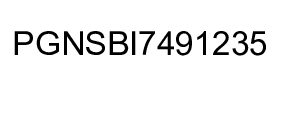

In [0]:
region=Find('Receipt No')
region

**Extracting text from region using Tesseract**



In [0]:
for j in table['Object']:
    text = pytesseract.image_to_string(Find(j))
    print(j,text,'\n')

Service No 09288020442 

Name GIBU KURIAN
MATHEW 

Bill Amount 2490 

Bill Month /Year 7/2019 

Receipt No PGNSBI7491235 

Receipt Date Monday, 1 July
2019 20:12 

Amount Debited 2490.0 

Bank Transaction No IGAGMIJFC6 

Bank Authorisation Id  

Card Type SBI NET BANKING 

